In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Linear regression

In [3]:
np.random.random()

0.5015438751688729

In [133]:
n = 100
a = 40
b = 103
x = np.random.uniform(0, 10, n).reshape(n, 1)
y = x * a + b + np.random.random(x.shape) * 100
y[x > 8] += 300

In [134]:
x, y

(array([[7.8601085 ],
        [1.59095945],
        [7.75430928],
        [7.88025922],
        [8.29551842],
        [7.93352401],
        [8.01413208],
        [8.35966376],
        [2.94023366],
        [2.32153875],
        [1.24757284],
        [2.60480754],
        [5.26338241],
        [4.37398929],
        [0.94180497],
        [5.71957224],
        [0.648152  ],
        [4.33957777],
        [1.61469559],
        [5.3078439 ],
        [4.21092722],
        [1.43554718],
        [1.72055398],
        [4.68512005],
        [6.95690229],
        [8.63444554],
        [3.71054592],
        [1.02282691],
        [4.05618032],
        [3.05763345],
        [9.60731838],
        [9.50871081],
        [4.86120997],
        [9.79026813],
        [4.36152857],
        [6.89968599],
        [6.33051028],
        [8.39661109],
        [7.77917659],
        [7.10478969],
        [8.56838706],
        [1.77827538],
        [8.87444367],
        [8.67619628],
        [4.05869512],
        [4

In [145]:
def linear_regresssion_np(x, y, iterations=2000, learning_rate=0.0001, reg = 0.1):
    dimensions, n = len(x[0]), len(x)
    beta_0 = 0
    beta_1 = np.array([[0.5] for _ in range(dimensions)])
    org_learning_rate = learning_rate

    for _ in range(iterations):
        error = y - (x.dot(beta_1) + beta_0)
        beta_1 += (x.T.dot(error) - beta_1 * reg) / n * learning_rate
        beta_0 += np.sum(error) / n * learning_rate
    return beta_0, beta_1

def apply_gradient(beta_0, beta_1, gradient_beta_0, gradient_beta_1, learning_rate):
    beta_0 += gradient_beta_0 * learning_rate
    for i in range(len(beta_1)):
        beta_1[i] += gradient_beta_1[i] * learning_rate
    return beta_0, beta_1

def compute_gradient(x, y, beta_0, beta_1, dimension, n, batch_size=20):
    gradient_beta_0 = 0
    gradient_beta_1 = [0] * dimension

    for _ in range(batch_size):
        i = random.randint(0, n - 1)
        prediction = sum(x[i][j] * beta_1[j] for j in range(dimension)) + beta_0
        error = y[i] - prediction
        for j in range(dimension):
            gradient_beta_1[j] += error * x[i][j] / n
        gradient_beta_0 += error / n

    return gradient_beta_0, gradient_beta_1

def parameter_initialization(dimensions):
    beta_0 = 0
    beta_1 = [random.random() for _ in range(dimensions)]
    return beta_0, beta_1 

def linear_regresssion(x, y, iterations=10, learning_rate=0.0001):
    dimensions, n = len(x[0]), len(x)
    beta_0, beta_1 = parameter_initialization(dimensions)
    for _ in range(iterations):
        gradient_beta_0, gradient_beta_1 = compute_gradient(x, y, beta_0, beta_1, dimensions, n)
        beta_0, beta_1 = apply_gradient(beta_0, beta_1, gradient_beta_0, gradient_beta_1, learning_rate)

    return beta_0, beta_1

def compute_error(x, y, beta_0, beta_1):
    return np.mean((y - beta_0 - x * beta_1) ** 2)


Text(0.5, 1.0, 'Regularization: 0')

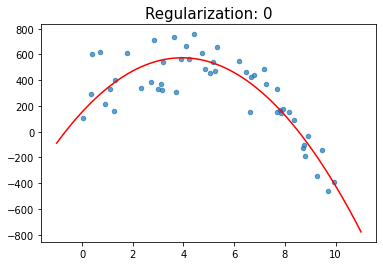

In [259]:
n = 50
a = 40
b = 103
c = 8
d = -2
x = np.random.uniform(0, 10, n).reshape(n, 1)
y = x ** 3 * d + x ** 2 * c + x * a + b + np.random.random(x.shape) * 500
feature = np.hstack((x, x ** 2))

b, a = linear_regresssion_np(feature, y, iterations=100000, learning_rate=0.0001, reg=0)

plt.scatter(x, y, alpha=0.7, s=20)
plot_x = np.linspace(-1, 11, 100).reshape(100, 1)
plot_feature = np.hstack([plot_x, plot_x ** 2])
plt.plot(plot_x, plot_feature.dot(a) + b, c='r')
plt.title('Regularization: 0', fontsize=15)

Text(0.5, 1.0, 'Regularization: 1000')

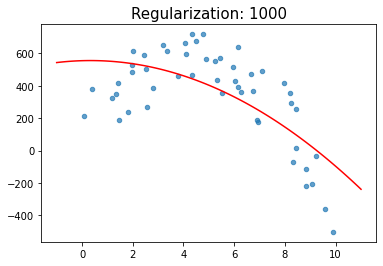

In [258]:
b, a = linear_regresssion_np(feature, y, iterations=100000, learning_rate=0.0001, reg=1000)

plt.scatter(x, y, alpha=0.7, s=20)
plot_x = np.linspace(-1, 11, 100).reshape(100, 1)
plot_feature = np.hstack([plot_x, plot_x ** 2])
plt.plot(plot_x, plot_feature.dot(a) + b, c='r')
plt.title('Regularization: 1000', fontsize=15)

## Plot steps

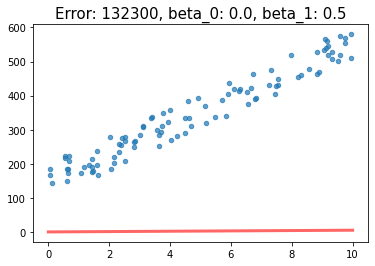

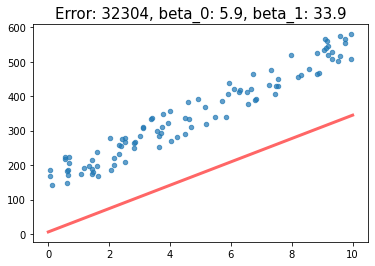

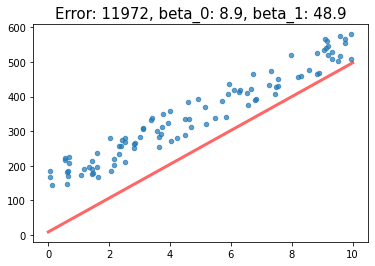

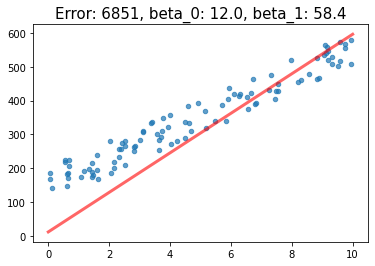

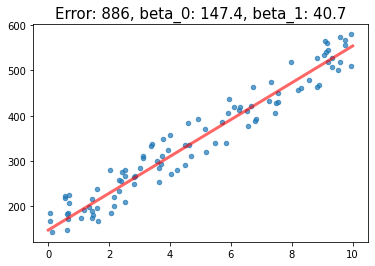

In [255]:
def plot_regression(x, y, beta_0, beta_1):
    plt.figure()
    plt.scatter(x, y, alpha=0.7, s=20)
    plt.plot([0, 10], [beta_0, beta_1[0, 0] * 10 + beta_0], c='r', lw=3, alpha=0.6)

n = 100
a = 40
b = 103
x = np.random.uniform(0, 10, n).reshape(n, 1)
y = x * a + b + np.random.random(x.shape) * 100

for iteration in [0, 2, 4, 8, 1000]:
    beta_0, beta_1 = linear_regresssion_np(x, y, iterations=iteration, learning_rate=0.01, reg=10)
    error = compute_error(x, y, beta_0, beta_1)
    plot_regression(x, y, beta_0, beta_1)
    plt.title('Error: {}, beta_0: {:.1f}, beta_1: {:.1f}'.format(int(error), beta_0, beta_1[0][0]), fontsize=15)


Text(0, 0.5, 'y')

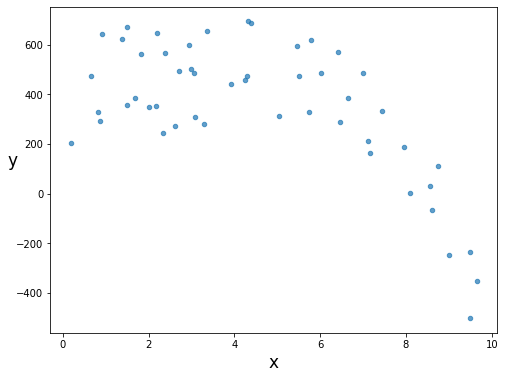

In [269]:
n = 50
a = 40
b = 103
c = 8
d = -2
x = np.random.uniform(0, 10, n).reshape(n, 1)
y = x ** 3 * d + x ** 2 * c + x * a + b + np.random.random(x.shape) * 500

f = plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, s=20)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17, rotation=0)

Text(0, 0.5, 'y')

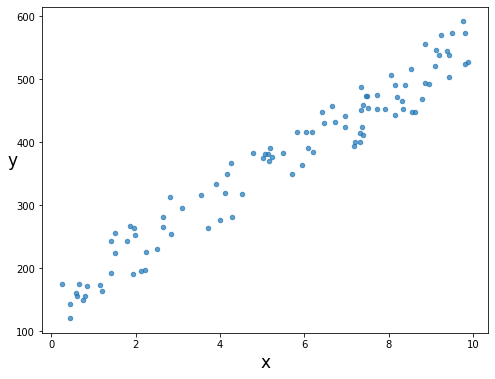

In [270]:
n = 100
a = 40
b = 103
x = np.random.uniform(0, 10, n).reshape(n, 1)
y = x * a + b + np.random.random(x.shape) * 100
f = plt.figure(figsize=(8, 6))

plt.scatter(x, y, alpha=0.7, s=20)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17, rotation=0)

# Logistic regression

In [747]:
n = 1000
x = np.random.random((n, 1)) * 10
y = (x > 5).astype(int).squeeze()

In [946]:
def logit_function_np(x, beta, beta_0):
    return 1 / (1 + np.exp(-x.dot(beta) - beta_0))

def compute_gradient_np(x, beta_0, beta, reg):
    p = logit_function_np(x, beta, beta_0)
    gradient_beta_0 = np.mean(p - y)
    gradient_beta = (p - y).dot(x) / len(x) + beta * reg
    return gradient_beta_0, gradient_beta

def logistic_regression_np(x, y, iterations=100, learning_rate=0.001, reg=100):
    n, dimension = len(x), len(x[0])
    beta_0 = 0
    beta = np.array([1.] * dimension)
    for i in range(iterations):
        gradient_beta_0, gradient_beta = compute_gradient_np(x, beta_0, beta, reg)
        beta_0 -= gradient_beta_0 * learning_rate
        beta -= gradient_beta * learning_rate
    return beta, beta_0

def logit_function(x, beta, beta_0):
    z = sum(x_i * beta_i for x_i, beta_i in zip(x, beta))
    z += beta_0
    return 1 / (1 + np.exp(-z))

def apply_gradient(beta_0, beta_1, gradient_beta_0, gradient_beta_1, learning_rate):
    beta_0 -= gradient_beta_0 * learning_rate
    for i in range(len(beta_1)):
        beta_1[i] -= gradient_beta_1[i] * learning_rate
    return beta_0, beta_1

def compute_gradient(x, beta_0, beta, dimension, n, regularization):
    gradient_beta_0 = 0
    gradient_beta = [0] * dimension
    for i, point in enumerate(x):
        p = logit_function(point, beta, beta_0)
        for j, feature in enumerate(point):
            gradient_beta[j] += (p - y[i]) * feature / n
        gradient_beta_0 += (p - y[i]) / n

    for j in range(dimension):
        gradient_beta[j] += regularization * beta[j]

    return gradient_beta_0, gradient_beta

def logistic_regression(x, y, iterations=100, learning_rate=0.001, reg=100):
    n, dimension = len(x), len(x[0])
    beta_0 = 0
    beta_1 = np.array([1.] * dimension)
    for i in range(iterations):
        gradient_beta_0, gradient_beta_1 = compute_gradient(x, beta_0, beta_1, len(x[0]), len(x), reg)
        beta_0, beta_1 = apply_gradient(beta_0, beta_1, gradient_beta_0, gradient_beta_1, learning_rate)
    return beta_1, beta_0


In [947]:
beta, beta_0 = logistic_regression(x, y, iterations=10, learning_rate=.1, reg=0)

In [948]:
logistic_regression_np(x, y, iterations=10, learning_rate=.1, reg=0)

(array([0.22617935]), -0.33620496348571544)

In [939]:
logit_function(x[1:2], [1], 0)

array([0.92187928])

In [937]:
logit_function_np(x[:2], [1], 0)

array([0.99990954, 0.92187928])

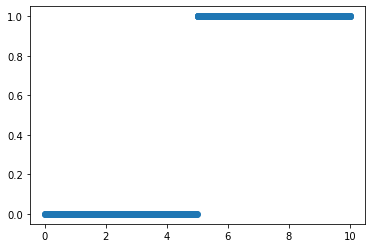

In [884]:
plt.scatter(x, y)

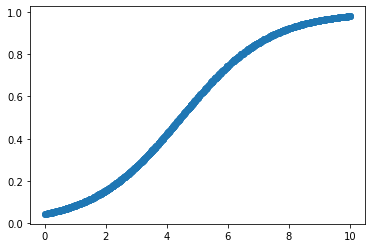

In [885]:
plt.scatter(x, logit_function_np(x, beta, beta_0))